# Predicting housing prices in King County, USA using deep learning and machine learning

In [1]:
import pandas as pd # import required libraries
pd.set_option("display.max_columns",100)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
#Regressin models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.tree import ExtraTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

from sklearn.model_selection import train_test_split
#Tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [2]:
df=pd.read_csv('kc_house_data.csv') #Reading data from csv file

# EDA - Exploratory Data Analysis

In [3]:
df.info()   #Give information about columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [4]:
df.head()   #Show the first 5 rows in the data frame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.sample(10) #Show 10 random rows

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
19627,8682302030,20140521T000000,413800.0,3,2.00,1440,4421,1.0,0,0,3,8,1440,0,2007,0,98053,47.7188,-122.024,1440,4157
14581,6929602721,20150408T000000,95000.0,2,1.00,960,7000,1.0,0,0,3,4,960,0,1918,0,98198,47.3864,-122.307,1850,8120
18528,7116500925,20140520T000000,206000.0,4,2.00,1700,6025,1.0,0,0,3,6,1700,0,1978,0,98002,47.3029,-122.221,1320,5956
2803,9222400935,20140523T000000,478000.0,3,1.00,1280,2580,1.5,0,0,3,8,1280,0,1910,2014,98115,47.6727,-122.320,1410,3150
189,1115810060,20141205T000000,585188.0,3,2.25,2230,10026,1.0,0,0,3,8,1430,800,1975,0,98052,47.6647,-122.153,2230,9340
846,8818900060,20141125T000000,664000.0,4,2.00,1530,4080,1.5,0,0,4,7,1530,0,1912,0,98105,47.6645,-122.325,1860,4080
11500,4322200105,20150331T000000,229050.0,1,1.00,420,3298,1.0,0,0,4,4,420,0,1949,0,98136,47.5375,-122.391,1460,4975
6202,9818700430,20141001T000000,421500.0,3,1.50,990,4500,1.0,0,0,5,7,990,0,1948,0,98122,47.6051,-122.298,1490,4000
9480,259600410,20150413T000000,505000.0,3,2.25,1460,7210,1.0,0,0,3,7,1460,0,1963,0,98008,47.6316,-122.119,1850,7519
11950,6383500295,20140815T000000,900000.0,4,2.75,3950,10214,1.0,0,3,3,10,2050,1900,1955,0,98117,47.6969,-122.384,3130,8608


In [6]:
df.tail() #Show the last 5 rows in the data frame

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,20141015T000000,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [7]:
df.describe() #Generate descriptive statistics

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.isnull().sum() # Detect missing values

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [9]:
df["zipcode"]=df["zipcode"].astype("category") #Convert the values in the zipcode column to category type

In [10]:
df['age']=2021-df['yr_built']    # Find the age of the houses by subtracting the year they were built from 2021 and create a new column.

In [11]:
df.corr() #Pearson Correlation Matrix,

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,age
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.001891,0.020799,-0.002901,-0.138798,-0.021380
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,-0.054012
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.154178
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175,-0.506019
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.318049
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,-0.053080
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269,-0.489319
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703,0.026161
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575,0.053440
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406,0.361417


In [12]:
df.sort_values('price') #Sort by house prices

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,age
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,55
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,1,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387,79
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,2,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500,109
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,1,5,730,0,1943,0,98168,47.4808,-122.315,860,9000,78
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,3,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,3,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750,12
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,3,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345,20
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,3,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730,20
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,3,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449,81


In [13]:
abs(df.corr()['price']).sort_values(ascending=False) #Sort columns headings by relation to prices

price            1.000000
sqft_living      0.702035
grade            0.667434
sqft_above       0.605567
sqft_living15    0.585379
bathrooms        0.525138
view             0.397293
sqft_basement    0.323816
bedrooms         0.308350
lat              0.307003
waterfront       0.266369
floors           0.256794
yr_renovated     0.126434
sqft_lot         0.089661
sqft_lot15       0.082447
yr_built         0.054012
age              0.054012
condition        0.036362
long             0.021626
id               0.016762
Name: price, dtype: float64

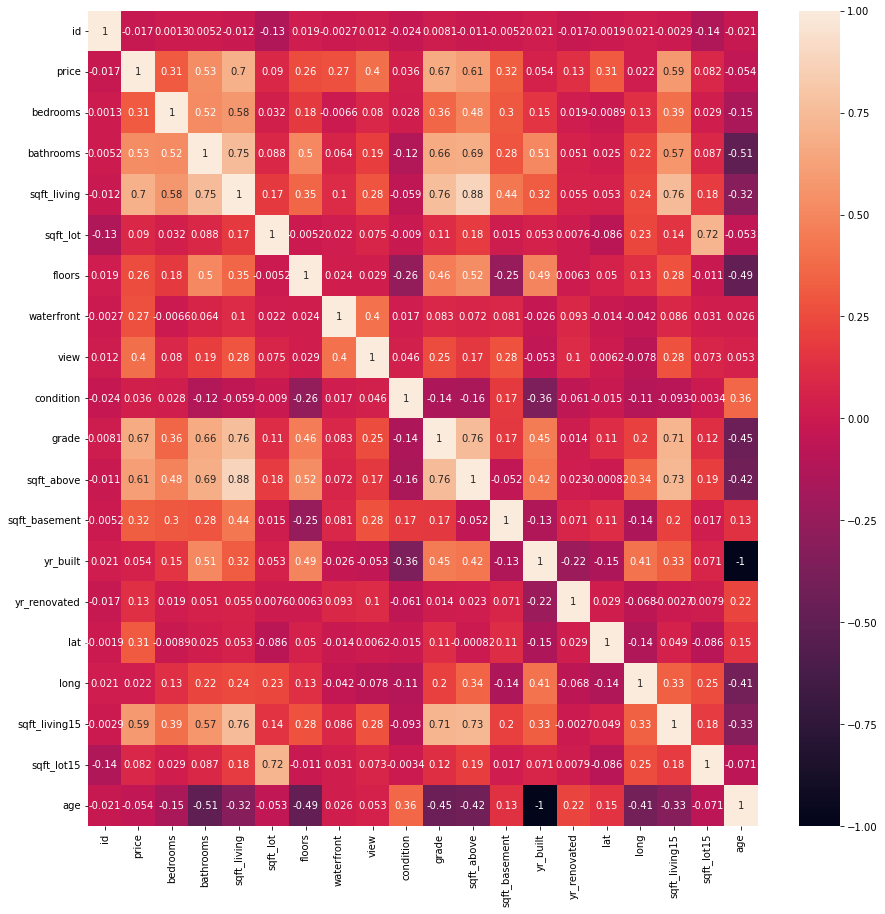

In [14]:
ax=plt.subplots(figsize=(15,15))
sns.heatmap(df.corr(),annot=True); #Show correlation heatmap

## Data Visualization

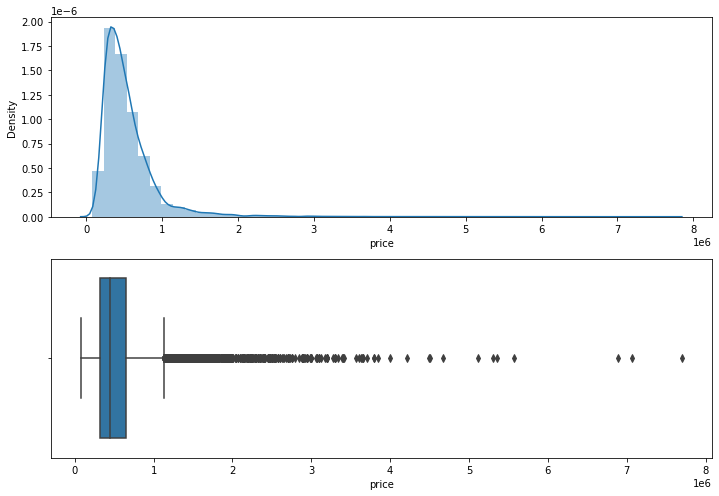

In [15]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price']) #Show distplot to see which prices have more densit
fig.add_subplot(2,1,2)
sns.boxplot(df['price']) # Show prices as boxplot to see outliers and common price range
plt.tight_layout()

<AxesSubplot:xlabel='sqft_basement', ylabel='price'>

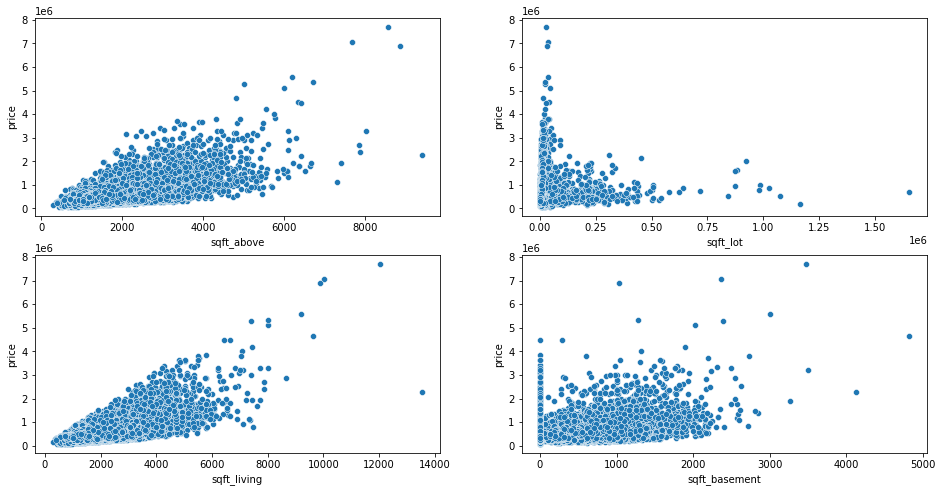

In [16]:
fig = plt.figure(figsize=(16,8))
fig.add_subplot(2,2,1)
sns.scatterplot(df['sqft_above'], df['price']) #Show scatter plot to see intensity and relationship between sqft_above and price
fig.add_subplot(2,2,2)
sns.scatterplot(df['sqft_lot'], df['price']) 
fig.add_subplot(2,2,3)
sns.scatterplot(df['sqft_living'], df['price'])
fig.add_subplot(2,2,4)
sns.scatterplot(df['sqft_basement'], df['price'])

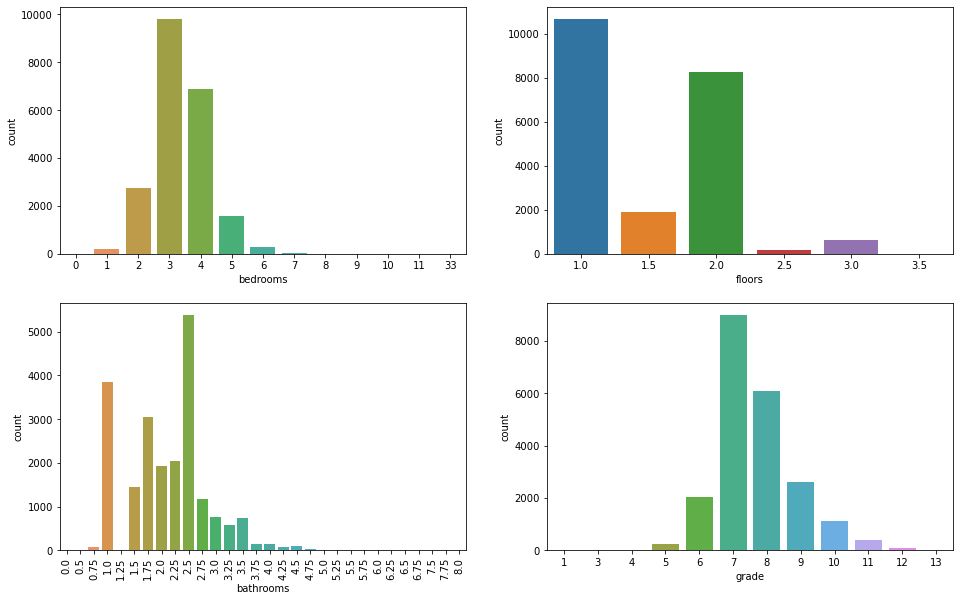

In [17]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,2,1)
sns.countplot(df['bedrooms']) # Show distribution of houses by the number of bedrooms
fig.add_subplot(2,2,2)
sns.countplot(df['floors'])
fig.add_subplot(2,2,3)
sns.countplot(df['bathrooms'])
plt.xticks(rotation=90)
fig.add_subplot(2,2,4)
sns.countplot(df['grade']);

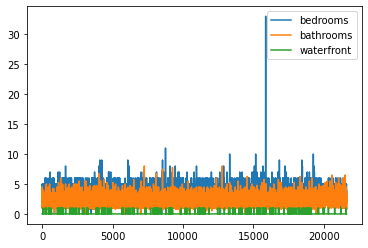

In [18]:
df.bedrooms.plot(), df.bathrooms.plot(), df.waterfront.plot()
plt.legend()

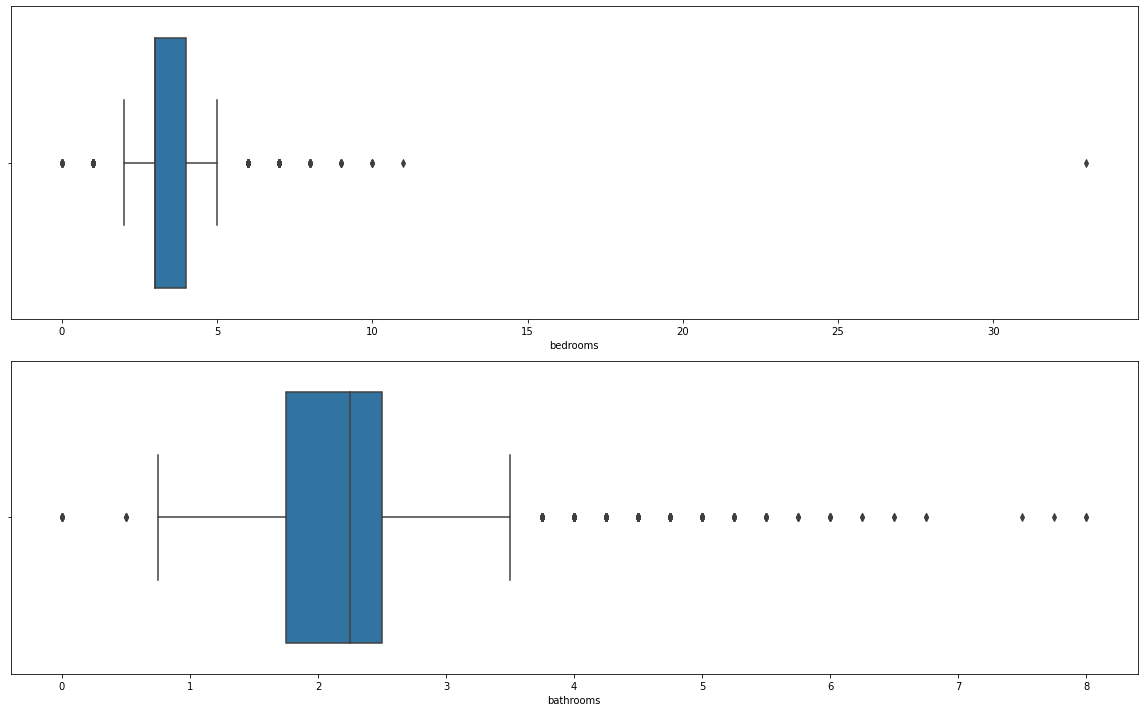

In [19]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,1,1)
sns.boxplot(df['bedrooms']) # to see outliers by bedrooms numbers
fig.add_subplot(2,1,2)
sns.boxplot(df['bathrooms']) # to see outliers by bathrooms numbers
plt.tight_layout()

In [20]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1 
print(IQR) #Inter Quantile Range

id               5.185851e+09
price            3.230500e+05
bedrooms         1.000000e+00
bathrooms        7.500000e-01
sqft_living      1.123000e+03
sqft_lot         5.648000e+03
floors           1.000000e+00
waterfront       0.000000e+00
view             0.000000e+00
condition        1.000000e+00
grade            1.000000e+00
sqft_above       1.020000e+03
sqft_basement    5.600000e+02
yr_built         4.600000e+01
yr_renovated     0.000000e+00
lat              2.070000e-01
long             2.030000e-01
sqft_living15    8.700000e+02
sqft_lot15       4.983000e+03
age              4.600000e+01
dtype: float64


## Feature Engineering

In [21]:
df=df[df['bedrooms']<10] #outlier (Remove houses with more than 10 bedrooms from the data frame)

In [22]:
df=df[df['bathrooms']<7] # outlier (Remove houses with more than 7 bathrooms from the data frame)

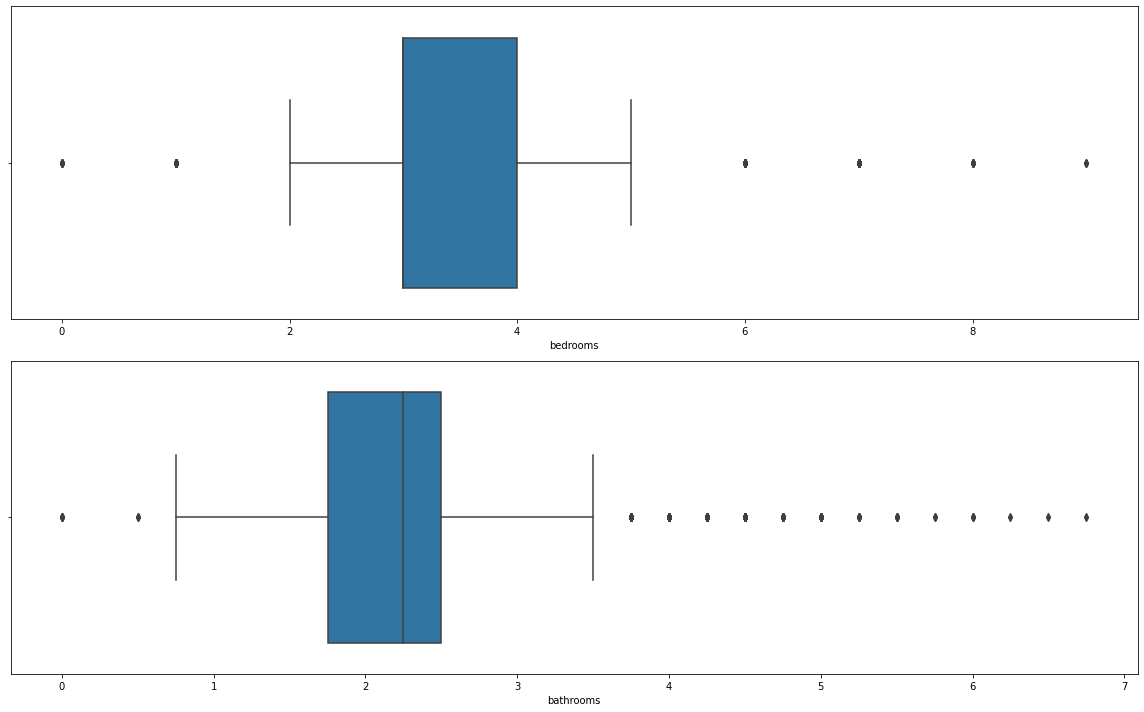

In [23]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,1,1)
sns.boxplot(df['bedrooms'])
fig.add_subplot(2,1,2)
sns.boxplot(df['bathrooms'])
plt.tight_layout()

In [24]:
df['bedrooms']=df['bedrooms']**2 #Since the numbers are small, we square them (number of rooms is a more obvious factor)

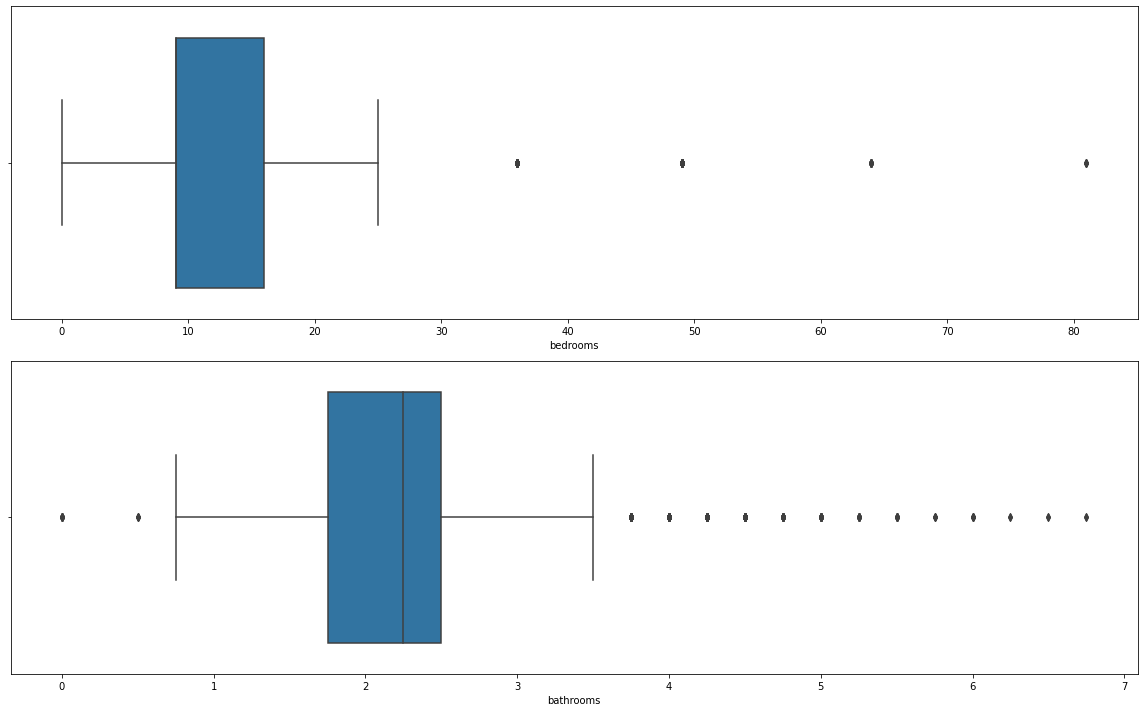

In [25]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(2,1,1)
sns.boxplot(df['bedrooms'])
fig.add_subplot(2,1,2)
sns.boxplot(df['bathrooms'])
plt.tight_layout()

In [26]:
df['basement']= np.where(df['sqft_basement']>0, 1, 0) #It matters whether there is more basement than basement area. Assign 1 to those higher than 0, keep the 0s the same
df['renovated']=np.where(df['yr_renovated']>0, 1, 0)  #Assign 1 to the renovated houses, keep the 0 ones the same.

In [27]:
# Remove outliers (different method)
#df=df[df['price']<(df['price'].mean()+3*df['price'].std()+1)] 
#df=df[df['sqft_living']<(df['sqft_living'].mean()+3*df['sqft_living'].std()+1)]

In [28]:
df.quantile(0.97).astype('int')

id              -2147483648
price               1388000
bedrooms                 25
bathrooms                 3
sqft_living            4140
sqft_lot              67364
floors                    2
waterfront                0
view                      3
condition                 5
grade                    10
sqft_above             3700
sqft_basement          1339
yr_built               2013
yr_renovated           1989
lat                      47
long                   -121
sqft_living15          3560
sqft_lot15            51400
age                     111
basement                  1
renovated                 1
Name: 0.97, dtype: int32

In [29]:
outliers=df.quantile(0.97) #Remove outliers
df=df[(df['price']<outliers['price'])]
df=df[(df['bedrooms']<outliers['bedrooms'])]
df=df[(df['sqft_living']<outliers['sqft_living'])]

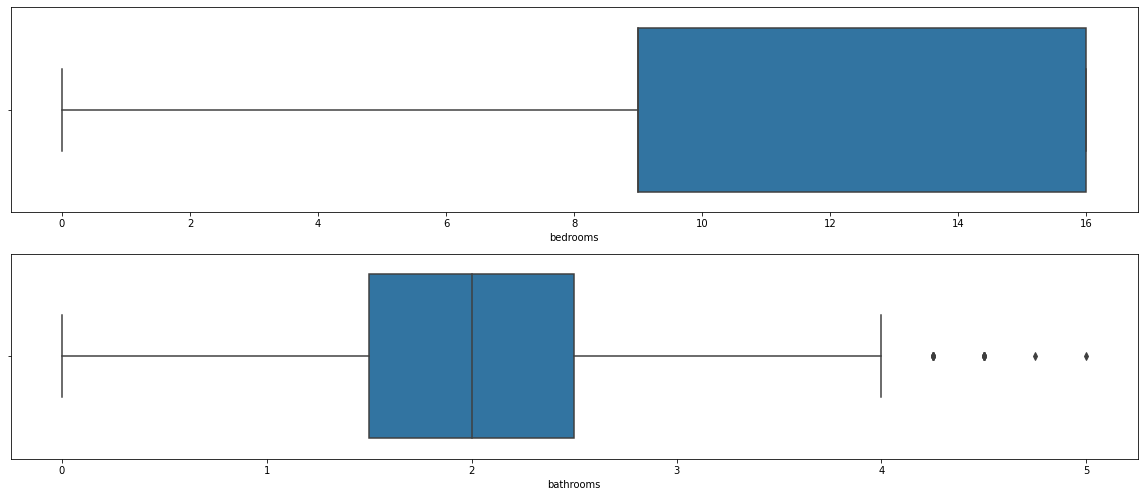

In [30]:
fig = plt.figure(figsize=(16,10))
fig.add_subplot(3,1,1)
sns.boxplot(df['bedrooms'])
fig.add_subplot(3,1,2)
sns.boxplot(df['bathrooms'])
plt.tight_layout()


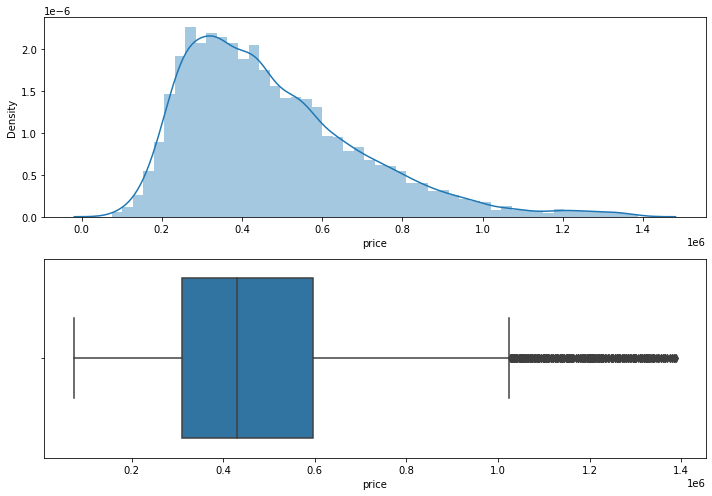

In [31]:
fig = plt.figure(figsize=(10,7))
fig.add_subplot(2,1,1)
sns.distplot(df['price'])
fig.add_subplot(2,1,2)
sns.boxplot(df['price'])
plt.tight_layout()

## Regression-Machine Learning

In [32]:
x, y=df[['sqft_living','grade','sqft_above','bathrooms','view','bedrooms','lat','waterfront','floors','zipcode','age','basement','renovated','condition']],df[['price']] #assigning price-influencing columns for training 

In [33]:
x.head()

,sqft_living,grade,sqft_above,bathrooms,view,bedrooms,lat,waterfront,floors,zipcode,age,basement,renovated,condition
0,1180,7,1180,1.00,0,9,47.5112,0,1.0,98178,66,0,0,3
1,2570,7,2170,2.25,0,9,47.7210,0,2.0,98125,70,1,1,3
2,770,6,770,1.00,0,4,47.7379,0,1.0,98028,88,0,0,3
3,1960,7,1050,3.00,0,16,47.5208,0,1.0,98136,56,1,0,5
4,1680,8,1680,2.00,0,9,47.6168,0,1.0,98074,34,0,0,3


In [34]:
x=pd.get_dummies(x,drop_first=True) #Dummy variable drop_first deletes first column, get_dummies writes strings in int format so we can give them to the model

In [35]:
y.head()

,price
0,221900.0
1,538000.0
2,180000.0
3,604000.0
4,510000.0


In [36]:
x.head()

,sqft_living,grade,sqft_above,bathrooms,view,bedrooms,lat,waterfront,floors,age,basement,renovated,condition,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,1180,7,1180,1.00,0,9,47.5112,0,1.0,66,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,2570,7,2170,2.25,0,9,47.7210,0,2.0,70,1,1,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,770,6,770,1.00,0,4,47.7379,0,1.0,88,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1960,7,1050,3.00,0,16,47.5208,0,1.0,56,1,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,1680,8,1680,2.00,0,9,47.6168,0,1.0,34,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [37]:
x.sample(10)

,sqft_living,grade,sqft_above,bathrooms,view,bedrooms,lat,waterfront,floors,age,basement,renovated,condition,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
2777,2040,8,2040,2.50,0,9,47.3090,0,2.0,36,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6591,1650,7,1650,1.75,0,9,47.3514,0,1.0,35,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16072,1890,7,1890,1.75,0,9,47.7676,0,2.0,69,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
17794,1580,7,1580,1.00,0,9,47.6840,0,1.5,95,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1288,1580,8,1200,2.25,0,9,47.4394,0,1.0,40,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12640,1670,7,1150,2.00,0,9,47.6096,0,1.0,60,1,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7966,1120,7,1120,1.00,0,9,47.7182,0,1.0,59,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
17991,1270,8,1270,2.50,0,9,47.5357,0,2.0,17,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
16753,1690,8,1690,2.50,0,9,47.2779,0,2.0,18,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
13127,1390,7,1340,2.25,0,4,47.6754,0,3.0,12,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [38]:
x.describe()

,sqft_living,grade,sqft_above,bathrooms,view,bedrooms,lat,waterfront,floors,age,basement,renovated,condition,zipcode_98002,zipcode_98003,zipcode_98004,zipcode_98005,zipcode_98006,zipcode_98007,zipcode_98008,zipcode_98010,zipcode_98011,zipcode_98014,zipcode_98019,zipcode_98022,zipcode_98023,zipcode_98024,zipcode_98027,zipcode_98028,zipcode_98029,zipcode_98030,zipcode_98031,zipcode_98032,zipcode_98033,zipcode_98034,zipcode_98038,zipcode_98039,zipcode_98040,zipcode_98042,zipcode_98045,zipcode_98052,zipcode_98053,zipcode_98055,zipcode_98056,zipcode_98058,zipcode_98059,zipcode_98065,zipcode_98070,zipcode_98072,zipcode_98074,zipcode_98075,zipcode_98077,zipcode_98092,zipcode_98102,zipcode_98103,zipcode_98105,zipcode_98106,zipcode_98107,zipcode_98108,zipcode_98109,zipcode_98112,zipcode_98115,zipcode_98116,zipcode_98117,zipcode_98118,zipcode_98119,zipcode_98122,zipcode_98125,zipcode_98126,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
count,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.00000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000,19034.000000
mean,1904.438268,7.513607,1665.769360,2.000827,0.178733,10.539298,47.557009,0.003993,1.473022,50.430388,0.361984,0.038352,3.405905,0.009667,0.013660,0.008616,0.006882,0.018914,0.005779,0.011821,0.004991,0.008721,0.006147,0.009194,0.011768,0.02464,0.003520,0.017863,0.013555,0.015919,0.012504,0.013502,0.005989,0.018756,0.025323,0.029421,0.000630,0.008616,0.026899,0.011085,0.026426,0.018703,0.013134,0.019176,0.021435,0.020752,0.014028,0.006094,0.013134,0.019754,0.015183,0.009194,0.017022,0.004571,0.029526,0.009036,0.015866,0.012819,0.008669,0.004676,0.009614,0.027950,0.016444,0.027372,0.023484,0.008353,0.013397,0.019859,0.017915,0.024220,0.013187,0.015499,0.014028,0.002942,0.020910,0.011663,0.013134,0.011401,0.012241,0.006357,0.013765,0.014711
std,712.456490,1.039517,685.907933,0.676303,0.658054,4.291567,0.141386,0.063064,0.541476,29.231334,0.480587,0.192051,0.648565,0.097847,0.116077,0.092425,0.082677,0.136223,0.075803,0.108083,0.070473,0.092982,0.078163,0.095446,0.107845,0.15503,0.059227,0.132456,0.115636,0.125165,0.111123,0.115415,0.077160,0.135665,0.157109,0.168988,0.025102,0.092425,0.161793,0.104705,0.160404,0.135479,0.113853,0.137148,0.144834,0.142558,0.117607,0.077830,0.113853,0.139158,0.122285,0.095446,0.129357,0.067455,0.169280,0.094632,0.124962,0.112497,0.092704,0.068222,0.097583,0.164834,0.127180,0.163169,0.151440,0.091017,0.114971,0.139520,0.132647,0.153735,0.114078,0.123528,0.117607,0.054163,0.143087,0.107368,0.113853,0.106166,0.109964,0.079479,0.116516,0.120395
min,290.000000,1.000000,290.000000,0.000000,0.000000,0.000000,47.155900,0.000000,1.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [39]:

x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13) #Separation of training and test data
print("Values in x_train",x_train)
print("Values in y_train",y_train)

Values in x_train        sqft_living  grade  sqft_above  bathrooms  view  bedrooms      lat  \
19358         1690      7        1690       1.75     0        16  47.5241   
6337          1030      7        1030       1.00     0         9  47.5742   
20612         1000      7         990       2.50     0         4  47.5419   
5581          2450      8        2450       3.00     0        16  47.7721   
3049          2520      7        1260       1.75     0        16  47.3224   
...            ...    ...         ...        ...   ...       ...      ...   
175           1120      8         820       2.50     0         9  47.6106   
972           1510      6         810       1.25     3         9  47.7289   
85            2140      9        1900       1.50     0         9  47.6337   
16432         2350      8        2350       2.50     0        16  47.3507   
383           2550      8        1580       2.25     0        16  47.6283   

       waterfront  floors  age  basement  renovated  cond

In [40]:
# PURPOSE: Train the data in 7 regression models and see the results in tabular form
# PARAMETERS: x: Dataframe containing house data, y: Prices of houses 
# RETURN: Show results in ascending order by R_squared
def algo_testing(x, y): 
    L = LinearRegression()
    E = ElasticNet()
    R = Ridge()
    Lass = Lasso()
    ETR = ExtraTreeRegressor()
    GBR = GradientBoostingRegressor()
    XGBC = XGBRegressor()
    
    x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2,random_state=13) 
    algos = [L, E, R, Lass, ETR, GBR, XGBC]
    algo_names = ["Linear","ElasticNet", "Ridge","Lasso","Extra Tree","Gradient Boosting","XGradientBoosting"]
    r_squared = []
    rmse = []
    mae = []
    
    result = pd.DataFrame(columns=["R_Squared","RMSE","MAE"],
                          index = algo_names) 
    for algo in algos:
        algo.fit(x_train,y_train) #Learning from training data with fit. Model learns by looking at x_train data versus y_train data
        algo.predict(x_test)  #Testing with the predict command. Predicts the prices of the houses in the data we reserved for the test with the model she learned
        
        r_squared.append(r2_score(y_test,algo.predict(x_test))) 
        rmse.append(mean_squared_error(y_test,algo.predict(x_test))**.5)
        mae.append(mean_absolute_error(y_test,algo.predict(x_test)))
        
    result.R_Squared = r_squared
    result.RMSE = rmse
    result.MAE = mae
    
    return result.sort_values('R_Squared', ascending = False)

In [41]:
algo_testing(x,y)

,R_Squared,RMSE,MAE
XGradientBoosting,0.852926,83456.055204,56170.651969
Gradient Boosting,0.828664,90077.119365,62964.009685
Lasso,0.821087,92047.516325,65314.183990
Linear,0.821031,92061.805515,65321.092071
Ridge,0.820879,92100.775551,65425.577983
Extra Tree,0.697786,119632.186291,79527.799273
ElasticNet,0.558229,144640.198136,110546.733167


In [42]:
#Use XGBRegressor as the most efficient estimates are obtained in XGBRegressor model
xgb = XGBRegressor()
model = xgb.fit(x_train, y_train)
pred = model.predict(x_test)

In [43]:
y_test= np.array(y_test)
pred = np.array(pred)

In [44]:
# PURPOSE: Create regression chart
# PARAMETERS: pred:Predictions based on test data, y:Prices of houses
# RETURN:N/A
def chart_regression(pred, y, sort=True):
    t = pd.DataFrame({'pred':pred, 'y':y})
    if sort:
        t.sort_values(by=['y'], inplace=True)
    plt.plot(t['y'].tolist(), label='expected')
    plt.plot(t['pred'].tolist(), label='prediction')
    plt.ylabel('output')
    plt.legend()
    plt.show()

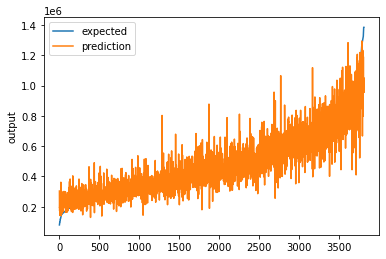

In [45]:
chart_regression(pred.flatten(),y_test.flatten()) #Create chart regression. Show expected value and predictions

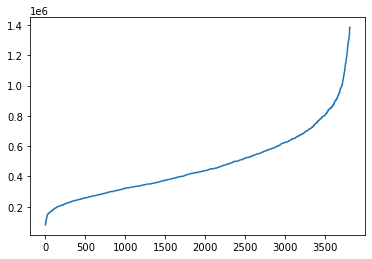

In [46]:
t = pd.DataFrame({'y':y_test.flatten()})
sort=True
if sort:
    t.sort_values(by=['y'], inplace=True)
plt.plot(t['y'].tolist(), label='expected') #Show expected values on chart

## Tensorflow-Deep Learning

In [47]:
#Creating a Neural Network Model
model = Sequential()
model.add(Dense(19, activation = 'relu')) # Activation faction=relu(rectifier linear unit) 
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(19, activation = 'relu'))
model.add(Dense(1))
model.compile(optimizer='Adam',loss='mse')

In [48]:
model.fit(x=x_train, y=y_train, validation_data=(x_test,y_test),epochs=1500, batch_size=120)
model.summary() #Training model

Epoch 1/1500
127/127 [==============================] - 1s 3ms/step - loss: 274542477312.0000 - val_loss: 247165976576.0000
Epoch 2/1500
127/127 [==============================] - 0s 2ms/step - loss: 131788464128.0000 - val_loss: 32553699328.0000
Epoch 3/1500
127/127 [==============================] - 0s 2ms/step - loss: 33873963008.0000 - val_loss: 31926106112.0000
Epoch 4/1500
127/127 [==============================] - 0s 2ms/step - loss: 33598203904.0000 - val_loss: 31727204352.0000
Epoch 5/1500
127/127 [==============================] - 0s 2ms/step - loss: 33326395392.0000 - val_loss: 31435397120.0000
Epoch 6/1500
127/127 [==============================] - 0s 1ms/step - loss: 33031948288.0000 - val_loss: 31399694336.0000
Epoch 7/1500
127/127 [==============================] - 0s 1ms/step - loss: 32762159104.0000 - val_loss: 31033227264.0000
Epoch 8/1500
127/127 [==============================] - 0s 2ms/step - loss: 32464631808.0000 - val_loss: 30633762816.0000
Epoch 9/1500
127/127 

127/127 [==============================] - 0s 1ms/step - loss: 26816894976.0000 - val_loss: 25477732352.0000
Epoch 68/1500
127/127 [==============================] - 0s 1ms/step - loss: 26755645440.0000 - val_loss: 25730533376.0000
Epoch 69/1500
127/127 [==============================] - 0s 1ms/step - loss: 26658570240.0000 - val_loss: 25320243200.0000
Epoch 70/1500
127/127 [==============================] - 0s 1ms/step - loss: 26577483776.0000 - val_loss: 25219893248.0000
Epoch 71/1500
127/127 [==============================] - 0s 1ms/step - loss: 26481158144.0000 - val_loss: 25153468416.0000
Epoch 72/1500
127/127 [==============================] - 0s 1ms/step - loss: 26389024768.0000 - val_loss: 25032271872.0000
Epoch 73/1500
127/127 [==============================] - 0s 1ms/step - loss: 26318606336.0000 - val_loss: 24950589440.0000
Epoch 74/1500
127/127 [==============================] - 0s 1ms/step - loss: 26258358272.0000 - val_loss: 24945827840.0000
Epoch 75/1500
127/127 [=======

127/127 [==============================] - 0s 1ms/step - loss: 11901708288.0000 - val_loss: 11234468864.0000
Epoch 134/1500
127/127 [==============================] - 0s 1ms/step - loss: 11822539776.0000 - val_loss: 11202523136.0000
Epoch 135/1500
127/127 [==============================] - 0s 2ms/step - loss: 11895869440.0000 - val_loss: 11128505344.0000
Epoch 136/1500
127/127 [==============================] - 0s 2ms/step - loss: 12303887360.0000 - val_loss: 11109686272.0000
Epoch 137/1500
127/127 [==============================] - 0s 2ms/step - loss: 11848014848.0000 - val_loss: 10995357696.0000
Epoch 138/1500
127/127 [==============================] - 0s 2ms/step - loss: 11621270528.0000 - val_loss: 10922259456.0000
Epoch 139/1500
127/127 [==============================] - 0s 2ms/step - loss: 11492257792.0000 - val_loss: 10881886208.0000
Epoch 140/1500
127/127 [==============================] - 0s 1ms/step - loss: 11466370048.0000 - val_loss: 10945971200.0000
Epoch 141/1500
127/127 

127/127 [==============================] - 0s 1ms/step - loss: 9262252032.0000 - val_loss: 9437950976.0000
Epoch 200/1500
127/127 [==============================] - 0s 1ms/step - loss: 9324957696.0000 - val_loss: 8782406656.0000
Epoch 201/1500
127/127 [==============================] - 0s 1ms/step - loss: 9316728832.0000 - val_loss: 8958420992.0000
Epoch 202/1500
127/127 [==============================] - 0s 1ms/step - loss: 9265634304.0000 - val_loss: 9014267904.0000
Epoch 203/1500
127/127 [==============================] - 0s 1ms/step - loss: 9194265600.0000 - val_loss: 8784474112.0000
Epoch 204/1500
127/127 [==============================] - 0s 1ms/step - loss: 9160379392.0000 - val_loss: 8774318080.0000
Epoch 205/1500
127/127 [==============================] - 0s 1ms/step - loss: 9265509376.0000 - val_loss: 8701721600.0000
Epoch 206/1500
127/127 [==============================] - 0s 1ms/step - loss: 9113452544.0000 - val_loss: 8817059840.0000
Epoch 207/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 8653168640.0000 - val_loss: 8382575616.0000
Epoch 267/1500
127/127 [==============================] - 0s 1ms/step - loss: 8587054592.0000 - val_loss: 8245658112.0000
Epoch 268/1500
127/127 [==============================] - 0s 1ms/step - loss: 8612985856.0000 - val_loss: 8485008896.0000
Epoch 269/1500
127/127 [==============================] - 0s 1ms/step - loss: 8558393344.0000 - val_loss: 8483930112.0000
Epoch 270/1500
127/127 [==============================] - 0s 1ms/step - loss: 8653644800.0000 - val_loss: 8225581056.0000
Epoch 271/1500
127/127 [==============================] - 0s 1ms/step - loss: 8627371008.0000 - val_loss: 9144353792.0000
Epoch 272/1500
127/127 [==============================] - 0s 1ms/step - loss: 8609769472.0000 - val_loss: 9501047808.0000
Epoch 273/1500
127/127 [==============================] - 0s 1ms/step - loss: 8706216960.0000 - val_loss: 8230341120.0000
Epoch 274/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 8462025728.0000 - val_loss: 8339576320.0000
Epoch 334/1500
127/127 [==============================] - 0s 1ms/step - loss: 8396440064.0000 - val_loss: 8087048704.0000
Epoch 335/1500
127/127 [==============================] - 0s 1ms/step - loss: 8341637632.0000 - val_loss: 8169541632.0000
Epoch 336/1500
127/127 [==============================] - 0s 1ms/step - loss: 8310904320.0000 - val_loss: 8178122240.0000
Epoch 337/1500
127/127 [==============================] - 0s 1ms/step - loss: 8384586752.0000 - val_loss: 7952583168.0000
Epoch 338/1500
127/127 [==============================] - 0s 1ms/step - loss: 8425081856.0000 - val_loss: 8767248384.0000
Epoch 339/1500
127/127 [==============================] - 0s 1ms/step - loss: 8417162752.0000 - val_loss: 7983956992.0000
Epoch 340/1500
127/127 [==============================] - 0s 1ms/step - loss: 8358869504.0000 - val_loss: 8440019968.0000
Epoch 341/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 8158379520.0000 - val_loss: 7859050496.0000
Epoch 401/1500
127/127 [==============================] - 0s 1ms/step - loss: 8056165888.0000 - val_loss: 7873644544.0000
Epoch 402/1500
127/127 [==============================] - 0s 1ms/step - loss: 8088318976.0000 - val_loss: 7855208448.0000
Epoch 403/1500
127/127 [==============================] - 0s 1ms/step - loss: 8107505664.0000 - val_loss: 7940309504.0000
Epoch 404/1500
127/127 [==============================] - 0s 1ms/step - loss: 8104241152.0000 - val_loss: 7921115648.0000
Epoch 405/1500
127/127 [==============================] - 0s 1ms/step - loss: 8315060736.0000 - val_loss: 7922193920.0000
Epoch 406/1500
127/127 [==============================] - 0s 1ms/step - loss: 8262385664.0000 - val_loss: 8709702656.0000
Epoch 407/1500
127/127 [==============================] - 0s 1ms/step - loss: 8160759808.0000 - val_loss: 8091049984.0000
Epoch 408/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 8073517568.0000 - val_loss: 8169844224.0000
Epoch 468/1500
127/127 [==============================] - 0s 1ms/step - loss: 7891536896.0000 - val_loss: 7806794240.0000
Epoch 469/1500
127/127 [==============================] - 0s 1ms/step - loss: 8101243392.0000 - val_loss: 7772130304.0000
Epoch 470/1500
127/127 [==============================] - 0s 1ms/step - loss: 7908306944.0000 - val_loss: 7851066880.0000
Epoch 471/1500
127/127 [==============================] - 0s 1ms/step - loss: 7911493120.0000 - val_loss: 8044095488.0000
Epoch 472/1500
127/127 [==============================] - 0s 1ms/step - loss: 8028469760.0000 - val_loss: 7839280128.0000
Epoch 473/1500
127/127 [==============================] - 0s 1ms/step - loss: 7985706496.0000 - val_loss: 7783570944.0000
Epoch 474/1500
127/127 [==============================] - 0s 1ms/step - loss: 7962582528.0000 - val_loss: 7897841152.0000
Epoch 475/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 8008953856.0000 - val_loss: 7750586368.0000
Epoch 535/1500
127/127 [==============================] - 0s 1ms/step - loss: 7880883200.0000 - val_loss: 7684086784.0000
Epoch 536/1500
127/127 [==============================] - 0s 1ms/step - loss: 7789182464.0000 - val_loss: 7799550464.0000
Epoch 537/1500
127/127 [==============================] - 0s 1ms/step - loss: 7871833088.0000 - val_loss: 7699332096.0000
Epoch 538/1500
127/127 [==============================] - 0s 1ms/step - loss: 7783667200.0000 - val_loss: 7733598720.0000
Epoch 539/1500
127/127 [==============================] - 0s 1ms/step - loss: 7806001664.0000 - val_loss: 7858237952.0000
Epoch 540/1500
127/127 [==============================] - 0s 1ms/step - loss: 7836545536.0000 - val_loss: 7708243968.0000
Epoch 541/1500
127/127 [==============================] - 0s 1ms/step - loss: 7834236416.0000 - val_loss: 7866716160.0000
Epoch 542/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7709621760.0000 - val_loss: 7722737664.0000
Epoch 602/1500
127/127 [==============================] - 0s 1ms/step - loss: 7724102656.0000 - val_loss: 7728753664.0000
Epoch 603/1500
127/127 [==============================] - 0s 1ms/step - loss: 7661134336.0000 - val_loss: 7693870592.0000
Epoch 604/1500
127/127 [==============================] - 0s 1ms/step - loss: 7828895744.0000 - val_loss: 8394299392.0000
Epoch 605/1500
127/127 [==============================] - 0s 2ms/step - loss: 7720035840.0000 - val_loss: 7782016000.0000
Epoch 606/1500
127/127 [==============================] - 0s 1ms/step - loss: 7688259072.0000 - val_loss: 8049846272.0000
Epoch 607/1500
127/127 [==============================] - 0s 1ms/step - loss: 7763984896.0000 - val_loss: 7738854400.0000
Epoch 608/1500
127/127 [==============================] - 0s 1ms/step - loss: 7769332224.0000 - val_loss: 8015311872.0000
Epoch 609/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7676901888.0000 - val_loss: 7701438976.0000
Epoch 669/1500
127/127 [==============================] - 0s 1ms/step - loss: 7619230208.0000 - val_loss: 7730699776.0000
Epoch 670/1500
127/127 [==============================] - 0s 1ms/step - loss: 7676130304.0000 - val_loss: 7829663744.0000
Epoch 671/1500
127/127 [==============================] - 0s 1ms/step - loss: 7699644416.0000 - val_loss: 8148850176.0000
Epoch 672/1500
127/127 [==============================] - 0s 1ms/step - loss: 7779423744.0000 - val_loss: 9751288832.0000
Epoch 673/1500
127/127 [==============================] - 0s 1ms/step - loss: 8022424064.0000 - val_loss: 7669830656.0000
Epoch 674/1500
127/127 [==============================] - 0s 1ms/step - loss: 7617335808.0000 - val_loss: 7712034816.0000
Epoch 675/1500
127/127 [==============================] - 0s 1ms/step - loss: 7765920256.0000 - val_loss: 7781043200.0000
Epoch 676/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7720410624.0000 - val_loss: 8410750464.0000
Epoch 736/1500
127/127 [==============================] - 0s 2ms/step - loss: 7646468608.0000 - val_loss: 7540218368.0000
Epoch 737/1500
127/127 [==============================] - 0s 2ms/step - loss: 7591100928.0000 - val_loss: 7639978496.0000
Epoch 738/1500
127/127 [==============================] - 0s 1ms/step - loss: 7531547136.0000 - val_loss: 7652158464.0000
Epoch 739/1500
127/127 [==============================] - 0s 1ms/step - loss: 7649975808.0000 - val_loss: 8064424960.0000
Epoch 740/1500
127/127 [==============================] - 0s 1ms/step - loss: 7623459840.0000 - val_loss: 7536082944.0000
Epoch 741/1500
127/127 [==============================] - 0s 2ms/step - loss: 7626068992.0000 - val_loss: 7732513792.0000
Epoch 742/1500
127/127 [==============================] - 0s 1ms/step - loss: 7579453440.0000 - val_loss: 7623842304.0000
Epoch 743/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7489502720.0000 - val_loss: 7520721408.0000
Epoch 803/1500
127/127 [==============================] - 0s 1ms/step - loss: 7573984256.0000 - val_loss: 7557708800.0000
Epoch 804/1500
127/127 [==============================] - 0s 1ms/step - loss: 7656329728.0000 - val_loss: 7614750720.0000
Epoch 805/1500
127/127 [==============================] - 0s 1ms/step - loss: 7568737280.0000 - val_loss: 7595761152.0000
Epoch 806/1500
127/127 [==============================] - 0s 1ms/step - loss: 7556914688.0000 - val_loss: 7562954240.0000
Epoch 807/1500
127/127 [==============================] - 0s 1ms/step - loss: 7641291776.0000 - val_loss: 8041859072.0000
Epoch 808/1500
127/127 [==============================] - 0s 1ms/step - loss: 7757077504.0000 - val_loss: 7496788480.0000
Epoch 809/1500
127/127 [==============================] - 0s 1ms/step - loss: 7485655040.0000 - val_loss: 7536695808.0000
Epoch 810/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7561505280.0000 - val_loss: 8172889088.0000
Epoch 870/1500
127/127 [==============================] - 0s 2ms/step - loss: 7483145728.0000 - val_loss: 7601698816.0000
Epoch 871/1500
127/127 [==============================] - 0s 1ms/step - loss: 7528265728.0000 - val_loss: 7896032256.0000
Epoch 872/1500
127/127 [==============================] - 0s 1ms/step - loss: 7500081664.0000 - val_loss: 7642088960.0000
Epoch 873/1500
127/127 [==============================] - 0s 1ms/step - loss: 7419646464.0000 - val_loss: 7757661696.0000
Epoch 874/1500
127/127 [==============================] - 0s 1ms/step - loss: 7470796800.0000 - val_loss: 7668615168.0000
Epoch 875/1500
127/127 [==============================] - 0s 1ms/step - loss: 7372822016.0000 - val_loss: 7480064000.0000
Epoch 876/1500
127/127 [==============================] - 0s 1ms/step - loss: 7453075968.0000 - val_loss: 7621001216.0000
Epoch 877/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7533134336.0000 - val_loss: 7477791744.0000
Epoch 937/1500
127/127 [==============================] - 0s 1ms/step - loss: 7398614016.0000 - val_loss: 7883624448.0000
Epoch 938/1500
127/127 [==============================] - 0s 1ms/step - loss: 7365734400.0000 - val_loss: 7573446656.0000
Epoch 939/1500
127/127 [==============================] - 0s 1ms/step - loss: 7360543232.0000 - val_loss: 7782945792.0000
Epoch 940/1500
127/127 [==============================] - 0s 1ms/step - loss: 7456401408.0000 - val_loss: 7760893440.0000
Epoch 941/1500
127/127 [==============================] - 0s 1ms/step - loss: 7395002368.0000 - val_loss: 7422419968.0000
Epoch 942/1500
127/127 [==============================] - 0s 1ms/step - loss: 7308369920.0000 - val_loss: 7527109632.0000
Epoch 943/1500
127/127 [==============================] - 0s 1ms/step - loss: 7422950912.0000 - val_loss: 7858016256.0000
Epoch 944/1500
127/127 [===============

127/127 [==============================] - 0s 1ms/step - loss: 7365684736.0000 - val_loss: 8177693696.0000
Epoch 1004/1500
127/127 [==============================] - 0s 1ms/step - loss: 7524610048.0000 - val_loss: 7696093696.0000
Epoch 1005/1500
127/127 [==============================] - 0s 1ms/step - loss: 7422643712.0000 - val_loss: 7463458304.0000
Epoch 1006/1500
127/127 [==============================] - 0s 1ms/step - loss: 7485466112.0000 - val_loss: 7457919488.0000
Epoch 1007/1500
127/127 [==============================] - ETA: 0s - loss: 7445344768.00 - 0s 1ms/step - loss: 7493873664.0000 - val_loss: 7929888768.0000
Epoch 1008/1500
127/127 [==============================] - 0s 1ms/step - loss: 7493428224.0000 - val_loss: 7488430592.0000
Epoch 1009/1500
127/127 [==============================] - 0s 1ms/step - loss: 7352451072.0000 - val_loss: 7525775360.0000
Epoch 1010/1500
127/127 [==============================] - 0s 1ms/step - loss: 7457297408.0000 - val_loss: 7540302336.0000


127/127 [==============================] - 0s 1ms/step - loss: 7452050944.0000 - val_loss: 7380982784.0000
Epoch 1070/1500
127/127 [==============================] - 0s 1ms/step - loss: 7314578432.0000 - val_loss: 7517990400.0000
Epoch 1071/1500
127/127 [==============================] - 0s 1ms/step - loss: 7347508224.0000 - val_loss: 7511435264.0000
Epoch 1072/1500
127/127 [==============================] - 0s 1ms/step - loss: 7394933248.0000 - val_loss: 7377463808.0000
Epoch 1073/1500
127/127 [==============================] - 0s 1ms/step - loss: 7334645760.0000 - val_loss: 7439328256.0000
Epoch 1074/1500
127/127 [==============================] - 0s 1ms/step - loss: 7337456640.0000 - val_loss: 7498239488.0000
Epoch 1075/1500
127/127 [==============================] - 0s 1ms/step - loss: 7235618816.0000 - val_loss: 8001680896.0000
Epoch 1076/1500
127/127 [==============================] - 0s 1ms/step - loss: 7385558016.0000 - val_loss: 7445318656.0000
Epoch 1077/1500
127/127 [=======

127/127 [==============================] - 0s 1ms/step - loss: 7252304896.0000 - val_loss: 7411400192.0000
Epoch 1136/1500
127/127 [==============================] - 0s 1ms/step - loss: 7209126400.0000 - val_loss: 7553447936.0000
Epoch 1137/1500
127/127 [==============================] - 0s 1ms/step - loss: 7429466112.0000 - val_loss: 7524623360.0000
Epoch 1138/1500
127/127 [==============================] - 0s 1ms/step - loss: 7292226560.0000 - val_loss: 7408455168.0000
Epoch 1139/1500
127/127 [==============================] - 0s 1ms/step - loss: 7375058944.0000 - val_loss: 7382305792.0000
Epoch 1140/1500
127/127 [==============================] - 0s 1ms/step - loss: 7220095488.0000 - val_loss: 7680616960.0000
Epoch 1141/1500
127/127 [==============================] - 0s 1ms/step - loss: 7307067392.0000 - val_loss: 7489967616.0000
Epoch 1142/1500
127/127 [==============================] - 0s 1ms/step - loss: 7356246016.0000 - val_loss: 7461122560.0000
Epoch 1143/1500
127/127 [=======

127/127 [==============================] - 0s 1ms/step - loss: 7279134208.0000 - val_loss: 7467935744.0000
Epoch 1202/1500
127/127 [==============================] - 0s 1ms/step - loss: 7426744832.0000 - val_loss: 7753401856.0000
Epoch 1203/1500
127/127 [==============================] - 0s 1ms/step - loss: 7262663168.0000 - val_loss: 7471373824.0000
Epoch 1204/1500
127/127 [==============================] - ETA: 0s - loss: 7446395904.00 - 0s 1ms/step - loss: 7282246656.0000 - val_loss: 7371987456.0000
Epoch 1205/1500
127/127 [==============================] - 0s 1ms/step - loss: 7253173760.0000 - val_loss: 7499215360.0000
Epoch 1206/1500
127/127 [==============================] - 0s 1ms/step - loss: 7274505728.0000 - val_loss: 7760600064.0000
Epoch 1207/1500
127/127 [==============================] - 0s 1ms/step - loss: 7326155264.0000 - val_loss: 7766926336.0000
Epoch 1208/1500
127/127 [==============================] - 0s 1ms/step - loss: 7344838144.0000 - val_loss: 7553615360.0000


127/127 [==============================] - 0s 1ms/step - loss: 7244499968.0000 - val_loss: 7537865216.0000
Epoch 1268/1500
127/127 [==============================] - 0s 1ms/step - loss: 7274943488.0000 - val_loss: 7299066368.0000
Epoch 1269/1500
127/127 [==============================] - 0s 1ms/step - loss: 7135739392.0000 - val_loss: 7307694080.0000
Epoch 1270/1500
127/127 [==============================] - 0s 1ms/step - loss: 7210520576.0000 - val_loss: 7394496000.0000
Epoch 1271/1500
127/127 [==============================] - 0s 1ms/step - loss: 7202053120.0000 - val_loss: 7577816576.0000
Epoch 1272/1500
127/127 [==============================] - 0s 1ms/step - loss: 7185181696.0000 - val_loss: 7429299200.0000
Epoch 1273/1500
127/127 [==============================] - 0s 1ms/step - loss: 7331411968.0000 - val_loss: 7290316288.0000
Epoch 1274/1500
127/127 [==============================] - 0s 1ms/step - loss: 7313228800.0000 - val_loss: 7505300480.0000
Epoch 1275/1500
127/127 [=======

127/127 [==============================] - 0s 1ms/step - loss: 7155371520.0000 - val_loss: 7364453376.0000
Epoch 1334/1500
127/127 [==============================] - 0s 1ms/step - loss: 7194283008.0000 - val_loss: 7357348864.0000
Epoch 1335/1500
127/127 [==============================] - 0s 1ms/step - loss: 7163372032.0000 - val_loss: 7501337600.0000
Epoch 1336/1500
127/127 [==============================] - 0s 1ms/step - loss: 7151776768.0000 - val_loss: 7563977728.0000
Epoch 1337/1500
127/127 [==============================] - 0s 1ms/step - loss: 7180142080.0000 - val_loss: 7345418240.0000
Epoch 1338/1500
127/127 [==============================] - 0s 1ms/step - loss: 7237147648.0000 - val_loss: 7872916480.0000
Epoch 1339/1500
127/127 [==============================] - 0s 1ms/step - loss: 7235714560.0000 - val_loss: 7424404992.0000
Epoch 1340/1500
127/127 [==============================] - 0s 1ms/step - loss: 7179272192.0000 - val_loss: 9130100736.0000
Epoch 1341/1500
127/127 [=======

Epoch 1400/1500
127/127 [==============================] - 0s 1ms/step - loss: 7182742528.0000 - val_loss: 7518390272.0000
Epoch 1401/1500
127/127 [==============================] - 0s 1ms/step - loss: 7256914432.0000 - val_loss: 7329291264.0000
Epoch 1402/1500
127/127 [==============================] - 0s 1ms/step - loss: 7175954432.0000 - val_loss: 8135296000.0000
Epoch 1403/1500
127/127 [==============================] - 0s 1ms/step - loss: 7251808768.0000 - val_loss: 7661942272.0000
Epoch 1404/1500
127/127 [==============================] - 0s 1ms/step - loss: 7148389888.0000 - val_loss: 7288883200.0000
Epoch 1405/1500
127/127 [==============================] - 0s 1ms/step - loss: 7191003648.0000 - val_loss: 7574161408.0000
Epoch 1406/1500
127/127 [==============================] - 0s 1ms/step - loss: 7215000576.0000 - val_loss: 7481636352.0000
Epoch 1407/1500
127/127 [==============================] - 0s 1ms/step - loss: 7131901440.0000 - val_loss: 7282497024.0000
Epoch 1408/1500


127/127 [==============================] - 0s 1ms/step - loss: 7135989248.0000 - val_loss: 7437808128.0000
Epoch 1467/1500
127/127 [==============================] - 0s 1ms/step - loss: 7096151552.0000 - val_loss: 7350558208.0000
Epoch 1468/1500
127/127 [==============================] - 0s 1ms/step - loss: 7283336704.0000 - val_loss: 8273043968.0000
Epoch 1469/1500
127/127 [==============================] - 0s 1ms/step - loss: 7197540864.0000 - val_loss: 7314435584.0000
Epoch 1470/1500
127/127 [==============================] - 0s 1ms/step - loss: 7064772096.0000 - val_loss: 7256673792.0000
Epoch 1471/1500
127/127 [==============================] - 0s 1ms/step - loss: 7151377408.0000 - val_loss: 7689005568.0000
Epoch 1472/1500
127/127 [==============================] - 0s 1ms/step - loss: 7193892352.0000 - val_loss: 7484408320.0000
Epoch 1473/1500
127/127 [==============================] - 0s 1ms/step - loss: 7117886464.0000 - val_loss: 7478921728.0000
Epoch 1474/1500
127/127 [=======

<AxesSubplot:>

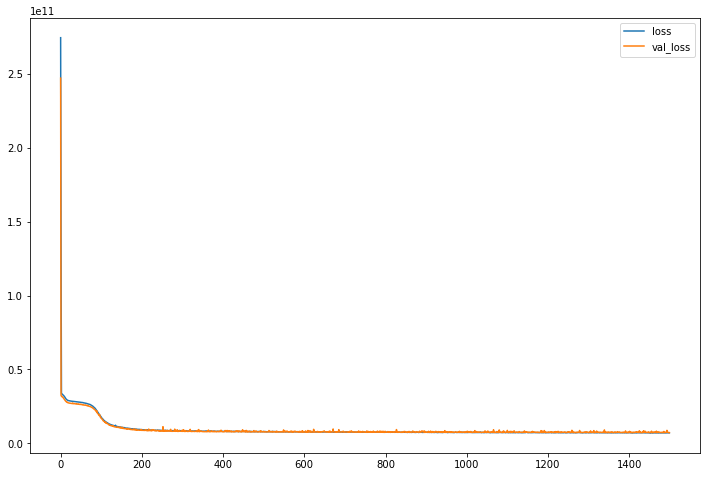

In [49]:
loss_df = pd.DataFrame(model.history.history)
loss_df.plot(figsize=(12,8))


In [50]:
pred_dl = model.predict(x_test)

In [51]:
(mean_squared_error(y_test,pred_dl))**0.5

85318.50461090246

In [52]:
r2_score(y_test,pred_dl)

0.8462888748834851

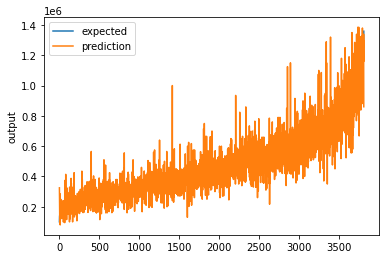

In [53]:
chart_regression(y_test.flatten(),pred_dl.flatten())

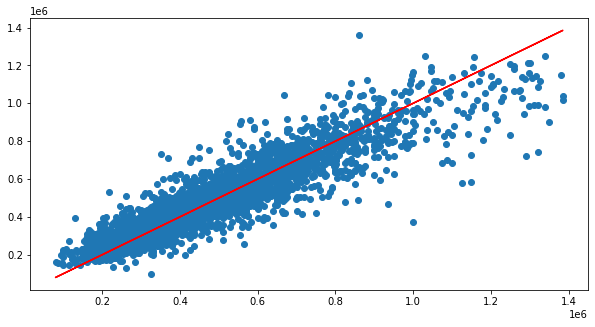

In [54]:
fig = plt.figure(figsize=(10,5))
plt.scatter(y_test,pred_dl)
plt.plot(y_test,y_test,'r')

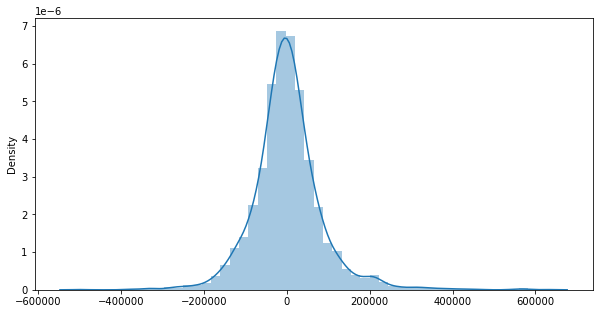

In [55]:
fig = plt.figure(figsize=(10,5))
residuals = (y_test-pred_dl)
sns.distplot(residuals);